# Drum sound test

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from rustic.utils import generate_wave, generate_bezier, time_scale
from rustic.generator import Generator

from IPython.display import Audio

## Start with a triangle wave

In [2]:
DURATION = 10.0
SAMPLE_RATE = 2000.0

In [3]:
wave = generate_wave(shape="triangle")  # Change this with a generator

Text(0.5, 0, 'time (s)')

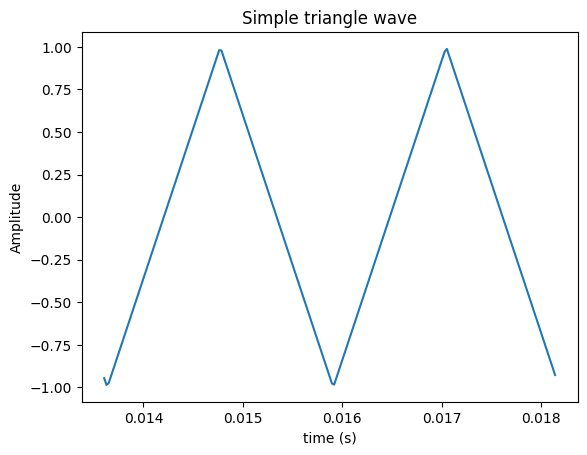

In [4]:
plt.plot(time_scale(200, 44100, offset=600), wave[600:801])
plt.title("Simple triangle wave")
plt.ylabel("Amplitude")
plt.xlabel("time (s)")

## Modulate Frequency

In [20]:
freq_from = 2.0
freq_to = 0.5
freq_duration = 0.5
freq_control = (0.0, 1.0)

ampl_from = 4.0
ampl_to = 0.0
ampl_duration = 2.0
ampl_control = (0.0, 0.0)

freq_modulation = lambda x: generate_bezier(x, _from=freq_from, to=freq_to, duration=freq_duration, control=freq_control)
ampl_modulation = lambda x: generate_bezier(x, _from=ampl_from, to=ampl_to, duration=ampl_duration, control=ampl_control)

nsamples = int(DURATION * SAMPLE_RATE)

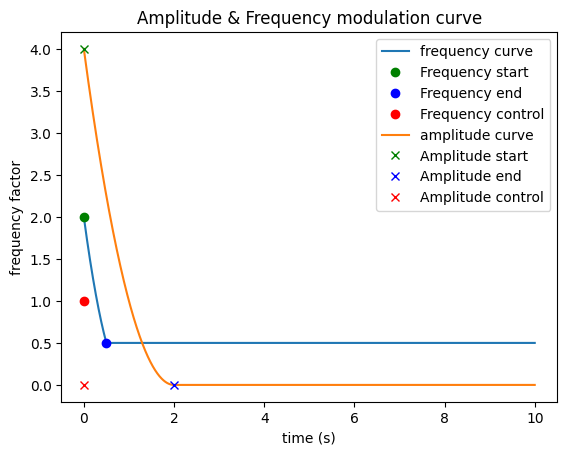

In [21]:
frequency_curve = [freq_modulation(x / SAMPLE_RATE) for x in range(nsamples)]
plt.plot([x / SAMPLE_RATE for x in range(nsamples)], frequency_curve, label="frequency curve")
plt.plot(0.0, freq_from, "go", label="Frequency start")
plt.plot(freq_duration, freq_to, "bo", label="Frequency end")
plt.plot(freq_control[0], freq_control[1], "ro", label="Frequency control")

amplitude_curve = [ampl_modulation(x / SAMPLE_RATE) for x in range(nsamples)]
plt.plot([x / SAMPLE_RATE for x in range(nsamples)], amplitude_curve, label="amplitude curve")
plt.plot(0.0, ampl_from, "gx", label="Amplitude start")
plt.plot(ampl_duration, ampl_to, "bx", label="Amplitude end")
plt.plot(ampl_control[0], ampl_control[1], "rx", label="Amplitude control")

plt.legend()

plt.title("Amplitude & Frequency modulation curve")
plt.ylabel("frequency factor")
plt.xlabel("time (s)")
plt.show()

In [24]:
generator = Generator(440, shape="sawtooth")

values = []

# Warp time to 0.5 after 0.3 seconds then beck to 1 after 0.3 seconds
for x in range(int(DURATION * SAMPLE_RATE)):
    actual_time = x / SAMPLE_RATE
    warp = freq_modulation(actual_time)
    value = generator.tick(1 / SAMPLE_RATE, warp=warp) * ampl_modulation(actual_time)
    values.append(value)

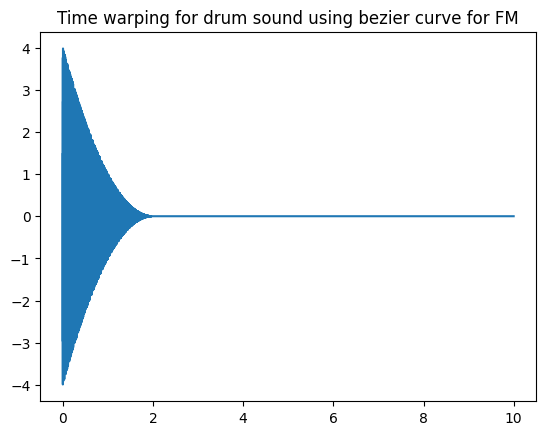

In [25]:
plt.plot(time_scale(DURATION * SAMPLE_RATE, sample_rate=SAMPLE_RATE), values)
plt.title("Time warping for drum sound using bezier curve for FM")
plt.show()


Audio(values, rate=SAMPLE_RATE)